In [9]:
%run jupyterutils.py

from linear_regression.LinearRegression import LinearRegression

### Linear Regression .ipynb file
We attempt to try and mimic linear regression and than test it , to test our implementations correctness we would generate the data set using a perfect linear equation , we will than compare how good our algorithm does when it get's data fitting a curve whose mathematically model is known. Run time and correctness might be good KPI for monitoring .



##### Create data

We'll check how good is the algorithm in finding the actual parameters when we feed it absolutely ideal data

In [10]:
x = sp.Symbol('x')
y = 0.8 * x + 0.6
print("y = ", end='')
sp.pprint(y)


y = 0.8⋅x + 0.6


In [11]:
def ModelEquation(input):
    return 0.8*input+0.6

In [12]:
total_data_points = 50000
x = np.linspace(0, 2, total_data_points)
y = ModelEquation(x)

perm = np.random.permutation(len(x))
x = x[perm]
y = y[perm]


##### Split data

We're going to split the data into training and testing data based on a tuneable parameter

In [13]:
training_percent = 0.85
training_numbers = int(training_percent*total_data_points)

training_features = ensure_column_vector(np.array(x[:training_numbers]))
training_labels = np.array(y[:training_numbers])

testing_attributes=ensure_column_vector(np.array(x[training_numbers:]))
testing_labels=np.array(y[training_numbers:])

##### Cleaning the data

In [14]:
training_features, training_labels, testing_attributes, testing_labels = train_test_split(x,y)


##### Model Training

(42500, 1) (42500,)
(7500, 1) (7500,)
Iteration  0  weights  [[0.53095377]]  bias  0.0002800178849709697 loss 1.965036880023784


Iteration  1000  weights  [[0.51810203]]  bias  0.25404372737720227 loss 1.3170789626631199
Iteration  2000  weights  [[0.50764037]]  bias  0.46180100760339365 loss 0.8827811771409908
Iteration  3000  weights  [[0.49912455]]  bias  0.6318926680937603 loss 0.5916903142208353
Iteration  4000  weights  [[0.49219285]]  bias  0.7711473555946238 loss 0.3965847404019711
Iteration  5000  weights  [[0.48655077]]  bias  0.8851557048912552 loss 0.26581389724499527
Iteration  6000  weights  [[0.48195852]]  bias  0.9784947867877816 loss 0.1781638175510633
Iteration  7000  weights  [[0.47822086]]  bias  1.0549118642563233 loss 0.11941571414336324
Iteration  8000  weights  [[0.47517886]]  bias  1.1174748340890792 loss 0.08003935751464887
Iteration  9000  weights  [[0.47270313]]  bias  1.1686953938916331 loss 0.05364705062932659
Iteration  10000  weights  [[0.4706883]]  bias  1.2106298792459178 loss 0.035957397435318963
Iteration  11000  weights  [[0.46904864]]  bias  1.2449618193846816 loss 0.0241007

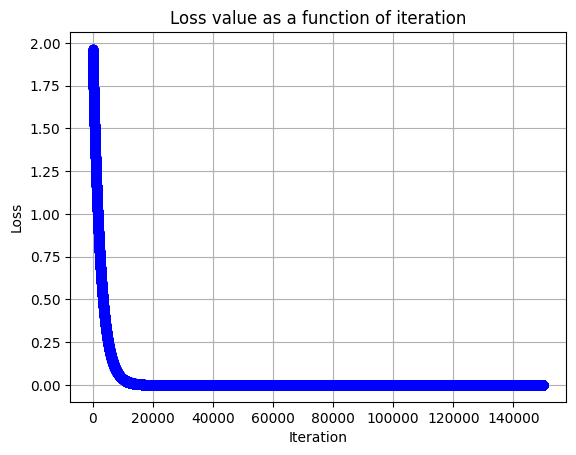

In [15]:
print(training_features.shape , training_labels.T.shape)
print(testing_attributes.shape , testing_labels.T.shape)
model = LinearRegression(training_features, training_labels.T , learning_rate=0.0001)
model.train(150000,True)

values = model.trainingLoss
x = np.arange(1, len(values) + 1)

# Plotting
plt.plot(x, values, marker='o', linestyle='-', color='blue')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss value as a function of iteration")
plt.grid(True)
plt.show()



#### Prediction Details

In [16]:
print("Predicted weights ", model.weight, " bias ", model.bias)
print("Prediction loss", model.calculateMseLoss(ModelEquation(testing_attributes),model.predict(testing_attributes)))

Predicted weights  [[0.46188945]]  bias  1.3999999999994452
Prediction loss 0.7483620577304622
